In [7]:
import numpy as np
import pandas as pd
import matplotlib as mp
import requests
from bs4 import BeautifulSoup
import json

In [8]:
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;size=200;template=results;trophy=117;type=batting'

In [9]:

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Referer": "https://www.espncricinfo.com/",
}
response = requests.get(url, headers=headers)
html_content = response.text

In [5]:
def extract_batting_data(html_content):
    soup = BeautifulSoup(html_content, "html.parser")

    tables = soup.select("table.engineTable")


    my_table = tables[2]

    # Get all rows from the tbody (third child of table)
    rows = my_table.find_all("tr")[1:]  # Skipping header row
    batting_data = []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 10:
            continue  # Skip if the row doesn't have enough columns
        
        temp_data = {
            "player": cols[0].text.strip(),
            "span": cols[1].text.strip(),
            "mat": cols[2].text.strip(),
            "runs": cols[5].text.strip(),
            "avg": cols[7].text.strip(),
            "sr": cols[9].text.strip(),
            "fours": cols[13].text.strip(),
            "sixes":cols[14].text.strip(),
        }
        batting_data.append(temp_data)
    return batting_data

In [10]:
def extract_bowling_data(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    tables = soup.select("table.engineTable")
    if len(tables) < 3:
        return []
    my_table = tables[2]

    rows = my_table.find_all("tr")[1:]
    bowling_data = []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 11:
            continue 
        temp_data = {
            "player": cols[0].text.strip().split("\n")[0],
            "span": cols[1].text.strip(),
            "mat": cols[2].text.strip(),
            "wickets": cols[7].text.strip(),
            "econ": cols[10].text.strip(),
            "sr": cols[11].text.strip(),
        }
        bowling_data.append(temp_data)
    return bowling_data 

In [11]:
data = []
batting_data = []
bowling_data = []
data = [batting_data, bowling_data]

In [8]:
#this is only for ipl
# #https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page=1;size=200;template=results;trophy=117;type=batting
'''for i in range(1,5):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page={};size=200;template=results;trophy=117;type=batting"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_batting_data(html_content=html_content)
    batting_data.extend(parsed_data)'''

'for i in range(1,5):\n    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page={};size=200;template=results;trophy=117;type=batting"\n    r = requests.get(link.format(i), headers=headers)\n    html_content = r.text\n    parsed_data = extract_batting_data(html_content=html_content)\n    batting_data.extend(parsed_data)'

In [9]:
#data from all major t20 leagues
#https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page=1;size=200;template=results;trophy=117;type=batting
for i in range(1,11):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page={};size=200;template=results;trophy=117;trophy=120;trophy=142;trophy=158;trophy=159;trophy=167;trophy=205;trophy=52;trophy=730;trophy=748;trophy=765;trophy=865;trophy=89;trophy=942;trophy=985;trophy=987;type=batting"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_batting_data(html_content=html_content)
    batting_data.extend(parsed_data)

In [10]:
#bowling data only for ipl
#https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page=1;size=200;template=results;trophy=117;type=batting

'''for i in range(1,5):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=wickets;page={};size=200;template=results;trophy=117;type=bowling"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_bowling_data(html_content=html_content)
    bowling_data.extend(parsed_data)'''

'for i in range(1,5):\n    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=wickets;page={};size=200;template=results;trophy=117;type=bowling"\n    r = requests.get(link.format(i), headers=headers)\n    html_content = r.text\n    parsed_data = extract_bowling_data(html_content=html_content)\n    bowling_data.extend(parsed_data)'

In [12]:
#bowling data for all t20 leagues
# https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=wickets;page=2;size=200;template=results;trophy=117;trophy=120;trophy=142;trophy=158;trophy=159;trophy=167;trophy=205;trophy=52;trophy=730;trophy=748;trophy=765;trophy=865;trophy=89;trophy=942;trophy=985;trophy=987;type=bowling
for i in range(1,11):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=wickets;page={};size=200;template=results;trophy=117;trophy=120;trophy=142;trophy=158;trophy=159;trophy=167;trophy=205;trophy=52;trophy=730;trophy=748;trophy=765;trophy=865;trophy=89;trophy=942;trophy=985;trophy=987;type=bowling"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_bowling_data(html_content=html_content)
    bowling_data.extend(parsed_data)

In [13]:
print(json.dumps(data[0][:2], indent=4))

[]


In [13]:
#print(data[0])
#print(json.dumps(data[0], indent=4))

In [14]:
batting_df = pd.DataFrame.from_dict(data[0])
batting_df

""


In [15]:
bowling_df = pd.DataFrame.from_dict(data[1])
bowling_df

,player,span,mat,wickets,econ,sr
0,DJ Bravo,2007-2024,433,496,8.42,16.9
1,SP Narine,2011-2025,409,442,6.09,21.3
2,Rashid Khan,2016-2025,314,408,6.52,17.8
3,AD Russell,2012-2025,392,364,8.75,16.4
4,Shakib Al Hasan,2007-2024,308,330,6.88,19.3
...,...,...,...,...,...,...
1995,AJ Dibble,2011-2011,2,2,5.50,24.0
1996,GD Drummond,2009-2009,2,2,10.83,18.0
1997,CA Dry,2024-2024,5,2,7.33,36.0
1998,MW Edwards,2018-2021,3,2,9.33,27.0


In [18]:
df = [batting_df, bowling_df]
df

[Empty DataFrame
 Columns: []
 Index: [],
                player       span  mat wickets   econ    sr
 0            DJ Bravo  2007-2024  433     496   8.42  16.9
 1           SP Narine  2011-2025  409     442   6.09  21.3
 2         Rashid Khan  2016-2025  314     408   6.52  17.8
 3          AD Russell  2012-2025  392     364   8.75  16.4
 4     Shakib Al Hasan  2007-2024  308     330   6.88  19.3
 ...               ...        ...  ...     ...    ...   ...
 1995        AJ Dibble  2011-2011    2       2   5.50  24.0
 1996      GD Drummond  2009-2009    2       2  10.83  18.0
 1997           CA Dry  2024-2024    5       2   7.33  36.0
 1998       MW Edwards  2018-2021    3       2   9.33  27.0
 1999          B Evans  2022-2022    2       2   8.14  21.0
 
 [2000 rows x 6 columns]]

In [19]:
# 1. Handle missing values
for d in df:
    
    d = d.dropna()
# Remove missing rows (or use df.fillna(value) to replace them)
#df[0]
#df[1]

In [20]:
print(df[0].columns)
print(df[1].columns)

RangeIndex(start=0, stop=0, step=1)
Index(['player', 'span', 'mat', 'wickets', 'econ', 'sr'], dtype='object')


In [19]:
# Process batting data
d = df[0] # Access Batting DataFrame


d["mat"] = pd.to_numeric(d["mat"], errors="coerce").fillna(0).astype(int)
d["runs"] = d["runs"].astype(str).str.replace(",", "", regex=True).replace(["-", "DNB", "NA", ""], "0").astype(int)
d["avg"] = pd.to_numeric(d["avg"], errors="coerce").fillna(0).astype(float)
d["sr"] = pd.to_numeric(d["sr"], errors="coerce").fillna(0).astype(float)
d["fours"] = pd.to_numeric(d["fours"], errors="coerce").fillna(0).astype(int)
d["sixes"] = pd.to_numeric(d["sixes"], errors="coerce").fillna(0).astype(int)


d[["start_year", "end_year"]] = d["span"].str.split("-", expand=True).astype(int)
d["career_length"] = d["end_year"] - d["start_year"] + 1


print(d.head())


       player       span  mat   runs    avg      sr  fours  sixes  start_year  \
0    CH Gayle  2007-2022  356  11448  36.92  143.92    866    839        2007   
1     V Kohli  2007-2024  308   9965  40.50  132.39    887    325        2007   
2  KA Pollard  2009-2024  493   9608  29.47  148.70    609    639        2009   
3   DA Warner  2009-2025  279   9296  38.25  138.82    937    330        2009   
4   RG Sharma  2007-2024  337   8878  30.93  131.91    807    374        2007   

   end_year  career_length  
0      2022             16  
1      2024             18  
2      2024             16  
3      2025             17  
4      2024             18  


In [21]:
# Process Bowling Data
d = df[1]  # Access bowling DataFrame

d["mat"] = pd.to_numeric(d["mat"], errors="coerce").fillna(0).astype(int)
d["wickets"] = (
    d["wickets"]
    .astype(str)  
    .str.replace(",", "", regex=True)  
    .replace(["-", "DNB", "NA", ""], "0")  
    .astype(int)  
)
d["econ"] = pd.to_numeric(d["econ"], errors="coerce").fillna(0).astype(float)
d["sr"] = pd.to_numeric(d["sr"], errors="coerce").fillna(0).astype(float)

d["start_year"] = d["span"].apply(lambda x: int(x.split("-")[0]) if isinstance(x, str) else 0)
d["end_year"] = d["span"].apply(lambda x: int(x.split("-")[1]) if isinstance(x, str) else 0)
d["career_length"] = d["end_year"] - d["start_year"] + 1

print(d.head())  


            player       span  mat  wickets  econ    sr  start_year  end_year  \
0         DJ Bravo  2007-2024  433      496  8.42  16.9        2007      2024   
1        SP Narine  2011-2025  409      442  6.09  21.3        2011      2025   
2      Rashid Khan  2016-2025  314      408  6.52  17.8        2016      2025   
3       AD Russell  2012-2025  392      364  8.75  16.4        2012      2025   
4  Shakib Al Hasan  2007-2024  308      330  6.88  19.3        2007      2024   

   career_length  
0             18  
1             15  
2             10  
3             14  
4             18  


In [21]:
'''from sklearn.preprocessing import MinMaxScaler

# Select batting DataFrame
d = df[0].copy()  # Work on a copy to avoid modifying the original

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to scale (EXCLUDING start_year, end_year, span)
cols_to_scale = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes"]

# Apply MinMaxScaler only on relevant columns
d[cols_to_scale] = scaler.fit_transform(d[cols_to_scale])

# Print the transformed DataFrame
print(d.head())'''


'from sklearn.preprocessing import MinMaxScaler\n\n# Select batting DataFrame\nd = df[0].copy()  # Work on a copy to avoid modifying the original\n\n# Initialize the scaler\nscaler = MinMaxScaler()\n\n# Columns to scale (EXCLUDING start_year, end_year, span)\ncols_to_scale = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes"]\n\n# Apply MinMaxScaler only on relevant columns\nd[cols_to_scale] = scaler.fit_transform(d[cols_to_scale])\n\n# Print the transformed DataFrame\nprint(d.head())'

In [22]:
'''from sklearn.preprocessing import MinMaxScaler

# Select batting DataFrame
d = df[1].copy()  # Work on a copy to avoid modifying the original

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to scale (EXCLUDING start_year, end_year, span)
cols_to_scale = ["mat", "wickets", "econ", "career_length"]

# Apply MinMaxScaler only on relevant columns
d[cols_to_scale] = scaler.fit_transform(d[cols_to_scale])

# Print the transformed DataFrame
print(d.head())'''


'from sklearn.preprocessing import MinMaxScaler\n\n# Select batting DataFrame\nd = df[1].copy()  # Work on a copy to avoid modifying the original\n\n# Initialize the scaler\nscaler = MinMaxScaler()\n\n# Columns to scale (EXCLUDING start_year, end_year, span)\ncols_to_scale = ["mat", "wickets", "econ", "career_length"]\n\n# Apply MinMaxScaler only on relevant columns\nd[cols_to_scale] = scaler.fit_transform(d[cols_to_scale])\n\n# Print the transformed DataFrame\nprint(d.head())'

In [23]:
'''import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for visualization
features = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes"]
d = df[0].copy()
# Plot histograms
d[features].hist(figsize=(12, 6), bins=20, edgecolor="black")
plt.suptitle("Distribution of Batting Features", fontsize=14)
plt.show()
'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Define columns for visualization\nfeatures = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes"]\nd = df[0].copy()\n# Plot histograms\nd[features].hist(figsize=(12, 6), bins=20, edgecolor="black")\nplt.suptitle("Distribution of Batting Features", fontsize=14)\nplt.show()\n'

In [24]:
df[0].to_csv("batting_data.csv", index="False")

In [22]:
df[1].to_csv("bowling_data.csv", index="False")

In [26]:
'''Initial Attempt to train model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from collections import Counter

# Load dataset
df = pd.read_csv("batting_data.csv")  # Replace with actual dataset path

# Feature Selection & Scaling
features = ["mat", "runs", "avg", "sr", "career_length"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Filtering Low-Experience Players
low_experience_threshold = 10  # Players with less than 10 matches
low_experience_players = df[df["mat"] < low_experience_threshold].copy()
high_experience_players = df[df["mat"] >= low_experience_threshold].copy()

# Clustering using K-Means on high-experience players
num_clusters = 4  # Anchor, Balanced, Power Hitter, Finisher
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
high_experience_players.loc[:, "cluster"] = kmeans.fit_predict(X_pca[high_experience_players.index])

# Assign Roles Based on Clusters
role_mapping = {
    0: "Anchor",
    1: "Balanced Player",
    2: "Power Hitter",
    3: "Finisher"
}
high_experience_players.loc[:, "role"] = high_experience_players["cluster"].map(role_mapping)
low_experience_players.loc[:, "role"] = "Low Experience"

# Combine Data Back
df_final = pd.concat([high_experience_players, low_experience_players])

# Supervised Learning - Neural Network
X_final = df_final[features]
y_final = df_final["role"]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Check class distribution
print("Class distribution:", Counter(y_train))

# Hyperparameter tuning for Neural Network
nn_params = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128)],  # Larger networks for better representation
    'activation': ['relu'],  # ReLU for deep networks
    'alpha': [0.0005, 0.001],  # Regularization to reduce overfitting
    'learning_rate_init': [0.005],  # Balanced learning rate
    'max_iter': [1500, 2000]  # More iterations for better convergence
}
nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.best_estimator_.predict(X_test)

# Model Evaluation
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))'''


'Initial Attempt to train model\nimport numpy as np\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.cluster import KMeans\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.metrics import classification_report\nfrom collections import Counter\n\n# Load dataset\ndf = pd.read_csv("batting_data.csv")  # Replace with actual dataset path\n\n# Feature Selection & Scaling\nfeatures = ["mat", "runs", "avg", "sr", "career_length"]\nX = df[features]\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Apply PCA for dimensionality reduction\npca = PCA(n_components=3)\nX_pca = pca.fit_transform(X_scaled)\n\n# Filtering Low-Experience Players\nlow_experience_threshold = 10  # Players with less than 10 matches\nlow_experience_players = df[df["mat"] < low_experience_threshold].copy()\nhigh_experience_players = df[df["mat"] >= low_e

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from collections import Counter

# Load dataset
df = pd.read_csv("batting_data.csv")  # Updated file name

# Feature Selection & Scaling
features = ["mat", "runs", "avg", "sr", "career_length"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Define Inexperienced Batters (less than 100 runs OR less than 10 matches)
inexperienced_players = df[(df["mat"] < 10) | (df["runs"] < 100)].copy()
experienced_players = df[(df["mat"] >= 10) & (df["runs"] >= 100)].copy()

# Clustering using K-Means on experienced players
num_clusters = 4  # Anchor, Balanced, Power Hitter, Finisher
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
experienced_players.loc[:, "cluster"] = kmeans.fit_predict(X_pca[experienced_players.index])

# Assign Roles Based on Clusters
role_mapping = {
    0: "Anchor",
    1: "Balanced Player",
    2: "Power Hitter",
    3: "Finisher"
}
experienced_players.loc[:, "role"] = experienced_players["cluster"].map(role_mapping)
inexperienced_players.loc[:, "role"] = "Inexperienced Batter"

# Combine Data Back
df_final = pd.concat([experienced_players, inexperienced_players])

# Supervised Learning - Neural Network
X_final = df_final[features]
y_final = df_final["role"]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Check class distribution
print("Class distribution:", Counter(y_train))

# Hyperparameter tuning for Neural Network
nn_params = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128)],  # Larger networks for better representation
    'activation': ['relu'],  # ReLU for deep networks
    'alpha': [0.0005, 0.001],  # Regularization to reduce overfitting
    'learning_rate_init': [0.005],  # Balanced learning rate
    'max_iter': [1500, 2000]  # More iterations for better convergence
}
nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.best_estimator_.predict(X_test)

# Model Evaluation
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Class distribution: Counter({'Anchor': 443, 'Power Hitter': 434, 'Inexperienced Batter': 410, 'Finisher': 257, 'Balanced Player': 56})
Neural Network Classification Report:
                      precision    recall  f1-score   support

              Anchor       0.68      0.71      0.69        92
     Balanced Player       0.56      0.90      0.69        10
            Finisher       0.93      0.68      0.79        73
Inexperienced Batter       0.92      0.92      0.92       120
        Power Hitter       0.72      0.79      0.75       105

            accuracy                           0.79       400
           macro avg       0.76      0.80      0.77       400
        weighted avg       0.81      0.79      0.79       400



In [28]:
# Final Model Training  
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, log_loss
import joblib  # For saving the unified model


df = pd.read_csv("batting_data.csv")

# Feature Engineering - Adding Boundary Percentage
df["boundary_pct"] = ((4 * df["fours"] + 6 * df["sixes"]) / df["runs"]) * 100


features = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes", "boundary_pct"]
X = df[features].fillna(df[features].mean())  # Handle missing values


def apply_feature_weights(X, role_type):
    weights = {
        "Anchor":        {"runs": 1.5, "avg": 1.3, "sr": 1.2, "fours": 1.0, "sixes": 1.0, "boundary_pct": 0.6},
        "Balanced":      {"runs": 1.0, "avg": 1.0, "sr": 1.0, "fours": 0.8, "sixes": 0.8, "boundary_pct": 1.0},
        "Power Hitter":  {"runs": 0.2, "avg": 0.4, "sr": 1.8, "fours": 2.0, "sixes": 2.0, "boundary_pct": 2.5},
        "Finisher":      {"runs": 0.4, "avg": 0.3, "sr": 1.6, "fours": 2.1, "sixes": 2.2, "boundary_pct": 2.0}
    }
    
    weighted_X = X.copy()
    for feature, weight in weights[role_type].items():
        if feature in weighted_X.columns:
            weighted_X[feature] *= weight
    
    return weighted_X


# Inexperienced Players (Less than 20 matches or 500 runs)
inexperienced_players = df[(df["mat"] < 20) | (df["runs"] < 500)].copy()
experienced_players = df[(df["mat"] >= 20) & (df["runs"] >= 500)].copy()

# K-Means for Inexperienced Players
X_inexperienced = apply_feature_weights(X.loc[inexperienced_players.index], "Balanced")
kmeans_inexperienced = KMeans(n_clusters=2, random_state=42, n_init=10)
inexperienced_players.loc[:, "role"] = kmeans_inexperienced.fit_predict(X_inexperienced)

inexperienced_players["role"] = inexperienced_players["role"].map({
    0: "Inexperienced - Potential Anchor",
    1: "Inexperienced - Potential Hitter"
})

# Power Hitter Identification (Rule-Based)
X_experienced_power = apply_feature_weights(X.loc[experienced_players.index], "Power Hitter")
power_hitter_criteria = (
    (experienced_players["boundary_pct"] > 60) &
    (experienced_players["sr"] > 135)
)
experienced_players.loc[power_hitter_criteria, "role"] = "Power Hitter"

# Finisher Identification (Rule-Based)
finisher_criteria = (
    (experienced_players["sr"] > 160) &
    ((experienced_players["fours"] + experienced_players["sixes"]) > 40)
)
experienced_players.loc[finisher_criteria, "role"] = "Finisher"

# GMM for Remaining Experienced Players
non_power_hitters = experienced_players[experienced_players["role"].isna()]
X_experienced_gmm = apply_feature_weights(X.loc[non_power_hitters.index], "Balanced")

gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=42)
non_power_hitters.loc[:, "GMM_Cluster"] = gmm.fit_predict(X_experienced_gmm)

# GMM Role Mapping 
role_mapping = {
    0: "Anchor",
    1: "Balanced Player",
    2: "Power Hitter",
    3: "Finisher"
}
non_power_hitters.loc[:, "role"] = non_power_hitters["GMM_Cluster"].map(role_mapping)

# Combine Experienced Data Back
experienced_players.update(non_power_hitters)

# Final Combined Dataset
df_final = pd.concat([experienced_players, inexperienced_players])


X_final = df_final[features]
y_final = df_final["role"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Neural Network with Hyperparameter Tuning
nn_params = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128)],
    'activation': ['relu'],
    'alpha': [0.0005, 0.001],
    'learning_rate_init': [0.005],
    'max_iter': [1500, 2000]
}
nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)

# Predictions
y_pred_nn = nn_model.best_estimator_.predict(X_test)
y_pred_proba = nn_model.best_estimator_.predict_proba(X_test)


print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print(f"Log Loss: {log_loss(y_test, y_pred_proba):.4f}")


full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('mlp_classifier', nn_model.best_estimator_)
])

# Saving the Unified Pipeline
joblib.dump(full_pipeline, "batting_data_model.pkl")

print("Batting data model saved successfully!")


C:\Users\praty\AppData\Local\Temp\ipykernel_25524\1746714016.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_power_hitters.loc[:, "GMM_Cluster"] = gmm.fit_predict(X_experienced_gmm)


Neural Network Classification Report:
                                  precision    recall  f1-score   support

                          Anchor       0.87      0.82      0.85        50
                 Balanced Player       0.78      1.00      0.88        18
                        Finisher       0.80      0.90      0.85        40
Inexperienced - Potential Anchor       0.92      0.94      0.93        65
Inexperienced - Potential Hitter       0.98      0.99      0.99       195
                    Power Hitter       0.86      0.56      0.68        32

                        accuracy                           0.92       400
                       macro avg       0.87      0.87      0.86       400
                    weighted avg       0.92      0.92      0.92       400

Log Loss: 0.1874
Batting data model saved successfully!


In [29]:
# Pipeline fitting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import joblib

# Ensure the pipeline is fitted before saving
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('mlp_classifier', MLPClassifier(random_state=42, max_iter=1500))
])

full_pipeline.fit(X_train, y_train)  # FITTING STEP
joblib.dump(full_pipeline, "batting_data_model.pkl")


['batting_data_model.pkl']

In [30]:

# Load the saved model
model = joblib.load("batting_data_model.pkl")


In [31]:
# Sample Testing
test_data = pd.DataFrame({
    "mat": [100, 90, 85, 8, 150],   
    "runs": [450, 3800, 5000, 200, 3000],  
    "avg": [18, 40, 20, 45, 25],   
    "sr": [130, 110, 110, 120, 180],  
    "career_length": [8, 9, 10, 2, 12],  
    "fours": [15, 230, 300, 25, 300],  
    "sixes": [8, 105, 70, 10, 200]   
})

test_data["boundary_pct"] = (
    (test_data["fours"] * 4 + test_data["sixes"] * 6) / test_data["runs"]
).fillna(0)  


In [32]:
predicted_roles = model.predict(test_data)
print("Predicted Roles:", predicted_roles)


Predicted Roles: ['Finisher' 'Finisher' 'Finisher' 'Inexperienced - Potential Hitter'
 'Balanced Player']


In [ ]:
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, log_loss
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the bowling data
print("Loading and preprocessing data...")
df = pd.read_csv("bowling_data.csv")
print(f"Original data shape: {df.shape}")

# Convert span to start_year and end_year if not already present
if 'start_year' not in df.columns and 'span' in df.columns:
    df[['start_year', 'end_year']] = df['span'].str.split('-', expand=True)
    df['start_year'] = pd.to_numeric(df['start_year'], errors='coerce')
    df['end_year'] = pd.to_numeric(df['end_year'], errors='coerce')

# Calculate career length if not already present
if 'career_length' not in df.columns:
    df['career_length'] = df['end_year'] - df['start_year'] + 1

# Feature Engineering
# Calculate strike rate if not present (balls per wicket)
if 'sr' not in df.columns:
    # If we have overs data, we can estimate strike rate
    # Assuming 6 balls per over on average
    if 'overs' in df.columns:
        # Avoid division by zero
        df['sr'] = np.where(df['wickets'] > 0, (df['overs'] * 6) / df['wickets'], df['overs'] * 6)
    else:
        # If no overs data, we can't calculate strike rate directly
        # We'll use matches as a proxy - this is not ideal but it's a fallback
        df['sr'] = np.where(df['wickets'] > 0, df['mat'] * 4 / df['wickets'], df['mat'] * 4)  # assuming each bowler bowls 4 overs per match

# Define features for model
features = ["mat", "wickets", "econ", "sr", "career_length"]

# Check for missing values before proceeding
print("\nMissing values in each column:")
print(df[features].isna().sum())

# More robust handling of missing values
print("\nHandling missing values...")
for col in features:
    if df[col].isna().any():
        median_val = df[col].median()
        print(f"Replacing {df[col].isna().sum()} NaN values in {col} with median: {median_val}")
        df[col] = df[col].fillna(median_val)

# Double-check that no NaNs remain
if df[features].isna().any().any():
    print("Warning: NaN values still present. Dropping rows with NaN values.")
    df = df.dropna(subset=features)
    print(f"Data shape after dropping NaNs: {df.shape}")

# Ensure all features are numeric
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Final check for NaNs
X = df[features]
if X.isna().any().any():
    print("ERROR: Still have NaN values. Dropping those rows.")
    df = df.dropna(subset=features)
    X = df[features]
    print(f"Final data shape: {df.shape}")

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)
if X.isna().any().any():
    print("Replacing inf values with median")
    for col in X.columns:
        median_val = X[col].median()
        X[col] = X[col].fillna(median_val)

print("\nData preparation complete. Beginning analysis...")

# Define function to apply feature weights based on bowling role
def apply_feature_weights(X, role_type):
    weights = {
        "Wicket Taker": {"wickets": 2.0, "sr": 2.5, "econ": 0.8, "mat": 1.0, "career_length": 1.0},
        "Economist": {"wickets": 0.8, "sr": 0.8, "econ": 2.5, "mat": 1.0, "career_length": 1.0},
        "Balanced": {"wickets": 1.0, "sr": 1.0, "econ": 1.0, "mat": 1.0, "career_length": 1.0}
    }
    
    weighted_X = X.copy()
    for feature, weight in weights[role_type].items():
        if feature in weighted_X.columns:
            weighted_X[feature] *= weight
    
    return weighted_X

# Separate experienced and inexperienced players
experienced_criteria = (df["career_length"] > 5) | (df["mat"] > 50)
experienced_players = df[experienced_criteria].copy()
inexperienced_players = df[~experienced_criteria].copy()

# Add experience label
experienced_players['experience'] = 'Experienced'
inexperienced_players['experience'] = 'Inexperienced'

print(f"\nExperienced players: {len(experienced_players)}")
print(f"Inexperienced players: {len(inexperienced_players)}")

# Process inexperienced players with K-Means
if len(inexperienced_players) >= 2:  # Need at least 2 samples for K-means
    X_inexperienced = apply_feature_weights(X.loc[inexperienced_players.index], "Balanced")
    
    # Make sure we have enough clusters (can't have more clusters than samples)
    n_clusters = min(2, len(inexperienced_players))
    
    kmeans_inexperienced = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    inexperienced_players.loc[:, "role"] = kmeans_inexperienced.fit_predict(X_inexperienced)

    # Map clusters to roles for inexperienced players
    if n_clusters == 2:
        # Get cluster centers to determine which is which
        cluster_centers = kmeans_inexperienced.cluster_centers_
        # Check which cluster has better (lower) strike rate
        sr_index = list(X_inexperienced.columns).index('sr')
        wicket_taker_cluster = np.argmin(cluster_centers[:, sr_index])
        economist_cluster = 1 - wicket_taker_cluster  # If there are only 2 clusters

        inexperienced_players["role"] = inexperienced_players["role"].map({
            wicket_taker_cluster: "Inexperienced - Potential Wicket Taker",
            economist_cluster: "Inexperienced - Potential Economist"
        })
    else:
        # If only one cluster, assign a generic role
        inexperienced_players["role"] = "Inexperienced - Undetermined"
else:
    # Too few inexperienced players for clustering
    inexperienced_players["role"] = "Inexperienced - Undetermined"

# Process experienced players
# Rule-based classification for clear cases
if len(experienced_players) > 0:
    # Wicket Takers (low strike rate)
    wicket_taker_criteria = (
        (experienced_players["sr"] < experienced_players["sr"].quantile(0.4)) &  # Lower sr is better for bowling
        (experienced_players["wickets"] > experienced_players["wickets"].quantile(0.6))
    )
    experienced_players.loc[wicket_taker_criteria, "role"] = "Wicket Taker"

    # Economists (low economy rate)
    economist_criteria = (
        (experienced_players["econ"] < experienced_players["econ"].quantile(0.4)) &  # Lower economy is better
        ~wicket_taker_criteria  # Not already classified as wicket taker
    )
    experienced_players.loc[economist_criteria, "role"] = "Economist"

    # GMM for remaining experienced players
    remaining_players = experienced_players[experienced_players["role"].isna()]
    
    if len(remaining_players) > 3:  # Need at least 4 samples for 3 clusters
        X_remaining = apply_feature_weights(X.loc[remaining_players.index], "Balanced")
        
        # Make sure no NaNs in X_remaining
        if X_remaining.isna().any().any():
            for col in X_remaining.columns:
                X_remaining[col] = X_remaining[col].fillna(X_remaining[col].median())
        
        gmm = GaussianMixture(n_components=min(3, len(remaining_players)-1), 
                              covariance_type='full', random_state=42)
        remaining_players.loc[:, "GMM_Cluster"] = gmm.fit_predict(X_remaining)

        # Analyze cluster centers to determine roles
        means = gmm.means_
        sr_index = list(X_remaining.columns).index('sr')
        econ_index = list(X_remaining.columns).index('econ')
        
        # Find the cluster with the lowest strike rate (best for wicket takers)
        wicket_taker_cluster = np.argmin(means[:, sr_index])
        
        # Find the cluster with the lowest economy (best for economists)
        economist_cluster = np.argmin(means[:, econ_index])
        
        # The remaining cluster is balanced
        n_components = min(3, len(remaining_players)-1)
        all_clusters = set(range(n_components))
        
        if wicket_taker_cluster == economist_cluster and n_components > 1:
            # If they're the same, choose the second best for economist
            sorted_indices = np.argsort(means[:, econ_index])
            economist_cluster = sorted_indices[1]
        
        if n_components == 3:
            balanced_cluster = list(all_clusters - {wicket_taker_cluster, economist_cluster})[0] if wicket_taker_cluster != economist_cluster else 2
            
            # GMM Role Mapping
            role_mapping = {
                wicket_taker_cluster: "Wicket Taker",
                economist_cluster: "Economist",
                balanced_cluster: "Balanced Bowler"
            }
        else:
            # With only 2 components, just map to wicket taker and economist
            role_mapping = {
                wicket_taker_cluster: "Wicket Taker",
                economist_cluster: "Economist"
            }
        
        remaining_players.loc[:, "role"] = remaining_players["GMM_Cluster"].map(role_mapping)
    else:
        # Not enough remaining players for GMM, just call them balanced
        remaining_players.loc[:, "role"] = "Balanced Bowler"

    # Update the experienced players dataframe
    experienced_players.update(remaining_players)
else:
    print("Warning: No experienced players in the dataset")

# Combine all players back together
df_final = pd.concat([experienced_players, inexperienced_players])

# Prepare data for ML model
X_final = df_final[features]
y_final = df_final["role"]

print(f"\nFinal role distribution:")
print(y_final.value_counts())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final if len(df_final) > 10 else None
)

print(f"\nTraining neural network...")
# Neural Network with Hyperparameter Tuning
# Use smaller network and fewer parameters for small datasets
if len(df_final) < 100:
    nn_params = {
        'hidden_layer_sizes': [(32, 16)],
        'activation': ['relu'],
        'alpha': [0.001],
        'max_iter': [1000]
    }
else:
    nn_params = {
        'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
        'activation': ['relu'],
        'alpha': [0.0005, 0.001],
        'learning_rate_init': [0.005],
        'max_iter': [1500, 2000]
    }

# Make sure our X_train doesn't have NaNs
if X_train.isna().any().any():
    print("Warning: Training data still has NaNs. Fixing...")
    for col in X_train.columns:
        X_train[col] = X_train[col].fillna(X_train[col].median())
        X_test[col] = X_test[col].fillna(X_train[col].median())

nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=min(3, len(X_train)//2) if len(X_train) > 6 else 2)
nn_model.fit(X_train, y_train)

print(f"\nBest neural network parameters: {nn_model.best_params_}")

# Predictions
y_pred_nn = nn_model.best_estimator_.predict(X_test)
y_pred_proba = nn_model.best_estimator_.predict_proba(X_test)

# Print classification report
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print(f"Log Loss: {log_loss(y_test, y_pred_proba):.4f}")

# Create full pipeline
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=min(3, len(features)-1))),
    ('mlp_classifier', nn_model.best_estimator_)
])

# Save the model
joblib.dump(full_pipeline, "bowling_data_model.pkl")
print("\nModel saved as 'bowling_data_model.pkl'")

# Add predicted roles to original dataframe and save
df['predicted_role'] = nn_model.best_estimator_.predict(X_final)
df.to_csv("bowling_data_with_roles.csv", index=False)
print("Enhanced data saved as 'bowling_data_with_roles.csv'")

# Print distribution of roles
print("\nDistribution of Bowling Roles:")
print(df['predicted_role'].value_counts())

# Print some example players for each role if available
roles = df['predicted_role'].unique()
print("\nExample players for each role:")
for role in roles:
    role_players = df[df['predicted_role'] == role]
    if len(role_players) > 0:
        print(f"\n{role} examples:")
        try:
            print(role_players.head(3)[['player', 'mat', 'wickets', 'econ', 'sr', 'career_length', 'predicted_role']])
        except KeyError:
            # If some columns don't exist, print what we have
            print(role_players.head(3))
'''

Loading and preprocessing data...
Original data shape: (2000, 10)

Missing values in each column:
mat              0
wickets          0
econ             0
sr               0
career_length    0
dtype: int64

Handling missing values...

Data preparation complete. Beginning analysis...

Experienced players: 1018
Inexperienced players: 982

Final role distribution:
role
Inexperienced - Potential Economist       758
Economist                                 451
Wicket Taker                              418
Inexperienced - Potential Wicket Taker    224
Balanced Bowler                           149
Name: count, dtype: int64

Training neural network...

Best neural network parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64), 'learning_rate_init': 0.005, 'max_iter': 1500}

Neural Network Classification Report:
                                        precision    recall  f1-score   support

                       Balanced Bowler       0.62      0.70      0.66 

In [ ]:
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Load the bowling data
print("Loading and preprocessing data...")
df = pd.read_csv("bowling_data.csv")
print(f"Data shape: {df.shape}")

# Calculate career length if not already present
if 'career_length' not in df.columns:
    df['career_length'] = df['end_year'] - df['start_year'] + 1

# Define features for model
features = ["mat", "wickets", "econ", "sr", "career_length"]
X = df[features]

# Apply multi-class labels instead of single classifications
print("Applying multi-class labels...")

# Define thresholds for each category
# For wicket takers - lower strike rate is better (fewer balls per wicket)
wicket_taker_threshold = df['sr'].quantile(0.4)  # Lower 40% of strike rates
# For economists - lower economy is better
economist_threshold = df['econ'].quantile(0.4)  # Lower 40% of economy rates
# For experience - either career length > 5 or matches > 50
experience_threshold_years = 5
experience_threshold_matches = 50

# Create binary classification columns
df['is_wicket_taker'] = (df['sr'] <= wicket_taker_threshold) & (df['wickets'] > df['wickets'].quantile(0.5))
df['is_economist'] = df['econ'] <= economist_threshold
df['is_experienced'] = (df['career_length'] > experience_threshold_years) | (df['mat'] > experience_threshold_matches)

# Create composite role
df['role'] = ''

# Function to determine composite role
def assign_role(row):
    role_parts = []
    
    # Experience part
    experience = "Experienced" if row['is_experienced'] else "Inexperienced"
    role_parts.append(experience)
    
    # Bowling style part
    if row['is_wicket_taker'] and row['is_economist']:
        role_parts.append("Elite Bowler")
    elif row['is_wicket_taker']:
        role_parts.append("Wicket Taker")
    elif row['is_economist']:
        role_parts.append("Economist")
    else:
        role_parts.append("Balanced Bowler")
    
    return " ".join(role_parts)

# Apply the function to create the composite role
df['role'] = df.apply(assign_role, axis=1)

print("\nRole distribution:")
print(df['role'].value_counts())

# Prepare data for ML model
X_final = df[features]
y_final = df['role']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

print(f"\nTraining neural network classifier...")
# Neural Network with Hyperparameter Tuning
nn_params = {
    'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
    'activation': ['relu'],
    'alpha': [0.0005, 0.001],
    'learning_rate_init': [0.005],
    'max_iter': [2000]
}

nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)

print(f"\nBest neural network parameters: {nn_model.best_params_}")

# Predictions
y_pred_nn = nn_model.best_estimator_.predict(X_test)

# Print classification report
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Create full pipeline
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('mlp_classifier', nn_model.best_estimator_)
])

# Save the model
joblib.dump(full_pipeline, "bowling_data_model.pkl")
print("\nModel saved as 'bowling_data_model.pkl'")

# Add predicted roles to original dataframe
df['predicted_role'] = nn_model.best_estimator_.predict(X_final)
df.to_csv("bowling_data_with_roles.csv", index=False)
print("Enhanced data saved as 'bowling_data_with_roles.csv'")

# Print some examples of each category
print("\nExample players for each role:")
for role in df['role'].unique():
    role_players = df[df['role'] == role]
    if len(role_players) > 0:
        print(f"\n{role} examples:")
        print(role_players.head(3)[['player', 'mat', 'wickets', 'econ', 'sr', 'career_length', 'role']])

# Summary statistics for each category
print("\nSummary statistics by role:")
role_stats = df.groupby('role')[features].mean().round(2)
print(role_stats)

# Create a function to classify new players
def classify_bowler(player_data, model=full_pipeline):
    """
    Classify a new bowler using the trained model
    
    Parameters:
    player_data (dict): Dictionary with keys ['mat', 'wickets', 'econ', 'sr', 'career_length']
    model (object): Trained pipeline model
    
    Returns:
    str: Predicted role
    """
    # Convert to DataFrame
    player_df = pd.DataFrame([player_data])
    
    # Predict using the model
    predicted_role = model.predict(player_df)[0]
    
    return predicted_role

# Example of how to use the classification function
print("\nExample of how to use the classification function:")
example_player = {
    'mat': 100,
    'wickets': 120,
    'econ': 7.2,
    'sr': 18.5,
    'career_length': 8
}
print(f"Example player: {example_player}")
print(f"Predicted role: {classify_bowler(example_player)}")

'''

Loading and preprocessing data...
Data shape: (2000, 10)
Applying multi-class labels...

Role distribution:
role
Inexperienced Balanced Bowler    482
Experienced Balanced Bowler      444
Inexperienced Economist          368
Experienced Economist            311
Experienced Wicket Taker         176
Experienced Elite Bowler          87
Inexperienced Wicket Taker        82
Inexperienced Elite Bowler        50
Name: count, dtype: int64

Training neural network classifier...

Best neural network parameters: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.005, 'max_iter': 2000}

Neural Network Classification Report:
                               precision    recall  f1-score   support

  Experienced Balanced Bowler       0.77      0.87      0.81        89
        Experienced Economist       0.75      0.66      0.70        62
     Experienced Elite Bowler       0.58      0.82      0.68        17
     Experienced Wicket Taker       0.96     

NotFittedError: Pipeline is not fitted yet.

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Load the bowling data
print("Loading and preprocessing data...")
df = pd.read_csv("bowling_data.csv")
print(f"Data shape: {df.shape}")

# Calculate career length if not already present
if 'career_length' not in df.columns:
    df['career_length'] = df['end_year'] - df['start_year'] + 1

# Calculate strike rate (balls per wicket) since it's not in the original data
# Assuming an average of 24 balls bowled per match (this is an estimation)
#df['sr'] = df.apply(lambda row: (row['mat'] * 24) / row['wickets'] if row['wickets'] > 0 else 100, axis=1)

# Define features for model
features = ["mat", "wickets", "econ", "sr", "career_length"]
X = df[features]

# Apply multi-class labels instead of single classifications
print("Applying multi-class labels...")

# Define thresholds for each category
# For wicket takers - lower strike rate is better (fewer balls per wicket)
wicket_taker_threshold = df['sr'].quantile(0.4)  # Lower 40% of strike rates
# For economists - lower economy is better
economist_threshold = df['econ'].quantile(0.4)  # Lower 40% of economy rates
# For experience - either career length > 5 or matches > 50
experience_threshold_years = 4.5
experience_threshold_matches = 50

# Create binary classification columns
df['is_wicket_taker'] = (df['sr'] <= wicket_taker_threshold) & (df['wickets'] > df['wickets'].quantile(0.5))
df['is_economist'] = df['econ'] <= economist_threshold
df['is_experienced'] = (df['career_length'] > experience_threshold_years) & (df['mat'] > experience_threshold_matches)

# Create composite role
df['role'] = ''

# Function to determine composite role
def assign_role(row):
    role_parts = []
    
    # Experience part
    experience = "Experienced" if row['is_experienced'] else "Inexperienced"
    role_parts.append(experience)
    
    # Bowling style part
    if row['is_wicket_taker'] and row['is_economist']:
        role_parts.append("Elite Bowler")
    elif row['is_wicket_taker']:
        role_parts.append("Wicket Taker")
    elif row['is_economist']:
        role_parts.append("Economist")
    else:
        role_parts.append("Balanced Bowler")
    
    return " ".join(role_parts)

# Apply the function to create the composite role
df['role'] = df.apply(assign_role, axis=1)

print("\nRole distribution:")
print(df['role'].value_counts())

# Prepare data for ML model
X_final = df[features]
y_final = df['role']

# First, create and fit the scaler with all data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Then create and fit PCA with all data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split after preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_final, test_size=0.2, random_state=42, stratify=y_final
)

print(f"\nTraining neural network classifier...")
# Neural Network with simpler hyperparameter tuning
nn_params = {
    'hidden_layer_sizes': [(64, 32)],
    'activation': ['relu'],
    'alpha': [0.001],
    'max_iter': [2000]
}

nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)

print(f"\nBest neural network parameters: {nn_model.best_params_}")

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Print classification report
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Create and fit full pipeline manually
# Instead of creating a pipeline and training it separately, 
# save the already trained components
print("\nSaving the trained model components...")
joblib.dump(scaler, "bowling_scaler.pkl")
joblib.dump(pca, "bowling_pca.pkl")
joblib.dump(nn_model, "bowling_nn_model.pkl")
print("Models saved as separate components")

# Add predicted roles to original dataframe
# We need to apply the same transformations as during training
X_final_transformed = pca.transform(scaler.transform(X_final))
df['predicted_role'] = nn_model.predict(X_final_transformed)
df.to_csv("bowling_data_with_roles.csv", index=False)
print("Enhanced data saved as 'bowling_data_with_roles.csv'")

# Print some examples of each category
print("\nExample players for each role:")
for role in df['role'].unique():
    role_players = df[df['role'] == role]
    if len(role_players) > 0:
        print(f"\n{role} examples:")
        print(role_players.head(3)[['player', 'mat', 'wickets', 'econ', 'sr', 'career_length', 'role']])
        


# Summary statistics for each category
print("\nSummary statistics by role:")
role_stats = df.groupby('role')[features].mean().round(2)
print(role_stats)

# Create a function to classify new bowlers
def classify_bowler(player_data):
    """
    Classify a new bowler using the trained model components
    
    Parameters:
    player_data (dict): Dictionary with keys ['mat', 'wickets', 'econ', 'sr', 'career_length']
                        If 'sr' is not provided, it will be calculated
    
    Returns:
    str: Predicted role
    """
    # Convert to DataFrame
    player_df = pd.DataFrame([player_data])
    
    # Calculate strike rate if not provided
    if 'sr' not in player_data:
        player_df['sr'] = (player_df['mat'] * 24) / player_df['wickets'] 
    
    # Load model components
    scaler = joblib.load("bowling_scaler.pkl")
    pca = joblib.load("bowling_pca.pkl")
    nn_model = joblib.load("bowling_nn_model.pkl")
    
    # Apply the same transformations
    player_scaled = scaler.transform(player_df[features])
    player_pca = pca.transform(player_scaled)
    
    # Predict using the model
    predicted_role = nn_model.predict(player_pca)[0]
    
    return predicted_role



Loading and preprocessing data...
Data shape: (2000, 10)
Applying multi-class labels...

Role distribution:
role
Inexperienced Balanced Bowler    728
Inexperienced Economist          536
Experienced Balanced Bowler      198
Inexperienced Wicket Taker       166
Experienced Economist            143
Inexperienced Elite Bowler       108
Experienced Wicket Taker          92
Experienced Elite Bowler          29
Name: count, dtype: int64

Training neural network classifier...

Best neural network parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'max_iter': 2000}

Neural Network Classification Report:
                               precision    recall  f1-score   support

  Experienced Balanced Bowler       0.71      0.87      0.78        39
        Experienced Economist       0.79      0.76      0.77        29
     Experienced Elite Bowler       0.62      0.83      0.71         6
     Experienced Wicket Taker       0.85      0.61      0.71        18
Inexperie

In [75]:
# Example of how to use the classification function
print("\nExample of how to use the classification function:")
example_player = {
    'mat': 17,
    'wickets': 35,
    'econ': 6.3,
    'sr': 16.5,
    'career_length': 2
    
}
print(f"Example player: {example_player}")
print("To classify a new player, use the classify_bowler() function after running this script:")
print("predicted_role = classify_bowler(example_player)")

# Test the function with the example player
print("\nImplementation validation - Classifying example player...")
try:
    # For demonstration only - in a real scenario this would be called separately
    # after the models are trained and saved
    predicted_role = classify_bowler(example_player)
    print(f"Predicted role: {predicted_role}")
except Exception as e:
    print(f"Error in classification example: {e}")
    print("To use the classify_bowler function, you need to run this script first to save the model files.")


Example of how to use the classification function:
Example player: {'mat': 17, 'wickets': 35, 'econ': 6.3, 'sr': 16.5, 'career_length': 2}
To classify a new player, use the classify_bowler() function after running this script:
predicted_role = classify_bowler(example_player)

Implementation validation - Classifying example player...
Error in classification example: "['runs', 'avg', 'fours', 'sixes', 'boundary_pct'] not in index"
To use the classify_bowler function, you need to run this script first to save the model files.


In [ ]:
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import joblib
from scipy.special import expit

# Load the bowling data
print("Loading and preprocessing data...")
df = pd.read_csv("bowling_data.csv")
print(f"Data shape: {df.shape}")

# Calculate career length if not already present
if 'career_length' not in df.columns:
    df['career_length'] = df['end_year'] - df['start_year'] + 1

# Define features
features = ["mat", "wickets", "econ", "sr", "career_length"]
X = df[features]

# --- Blended Classification Logic (Option B) ---
print("Applying blended classification logic...")

# Hard cutoffs
sr_cutoff = df['sr'].quantile(0.4)
econ_cutoff = df['econ'].quantile(0.4)
wickets_median = df['wickets'].median()
experience_years = 5
experience_matches = 50

# Soft scoring helper
def soft_override(value, cutoff, scale=1.0, reverse=False):
    score = expit((value - cutoff) / scale)
    return 1 - score if reverse else score

# Apply blended rules row-wise
def blended_classification(row):
    is_exp = (row['career_length'] > experience_years) and (row['mat'] > experience_matches)
    is_wt = (row['sr'] <= sr_cutoff) and (row['wickets'] > wickets_median)
    is_eco = row['econ'] <= econ_cutoff

    near_sr = abs(row['sr'] - sr_cutoff) < (0.1 * sr_cutoff)
    near_econ = abs(row['econ'] - econ_cutoff) < (0.1 * econ_cutoff)
    near_exp = (
        abs(row['career_length'] - experience_years) < 1 and 
        abs(row['mat'] - experience_matches) < 10
    )

    if not is_wt and near_sr:
        score = soft_override(row['sr'], sr_cutoff, scale=2.0, reverse=True)
        if score > 0.6 and row['wickets'] > wickets_median * 0.9:
            is_wt = True

    if not is_eco and near_econ:
        score = soft_override(row['econ'], econ_cutoff, scale=0.3, reverse=True)
        if score > 0.6:
            is_eco = True

    if not is_exp and near_exp:
        score_years = soft_override(row['career_length'], experience_years, scale=1.0)
        score_mat = soft_override(row['mat'], experience_matches, scale=5.0)
        exp_score = score_years * score_mat
        if exp_score > 0.6:
            is_exp = True

    return pd.Series({
        'is_wicket_taker': is_wt,
        'is_economist': is_eco,
        'is_experienced': is_exp
    })

df[['is_wicket_taker', 'is_economist', 'is_experienced']] = df.apply(blended_classification, axis=1)

# Assign roles
def assign_role(row):
    role_parts = []
    role_parts.append("Experienced" if row['is_experienced'] else "Inexperienced")

    if row['is_wicket_taker'] and row['is_economist']:
        role_parts.append("Elite Bowler")
    elif row['is_wicket_taker']:
        role_parts.append("Wicket Taker")
    elif row['is_economist']:
        role_parts.append("Economist")
    else:
        role_parts.append("Balanced Bowler")

    return " ".join(role_parts)

df['role'] = df.apply(assign_role, axis=1)

print("\nRole distribution:")
print(df['role'].value_counts())

# Prepare data
X_final = df[features]
y_final = df['role']

# Scale and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# Train neural network
print("\nTraining neural network classifier...")
nn_params = {
    'hidden_layer_sizes': [(64, 32)],
    'activation': ['relu'],
    'alpha': [0.001],
    'max_iter': [2000]
}

nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)

print(f"\nBest neural network parameters: {nn_model.best_params_}")

# Predict and report
y_pred_nn = nn_model.predict(X_test)
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Save model components
print("\nSaving the trained model components...")
joblib.dump(scaler, "bowling_scaler.pkl")
joblib.dump(pca, "bowling_pca.pkl")
joblib.dump(nn_model, "bowling_nn_model.pkl")
print("Models saved as separate components")

# Add predictions to original data
X_final_transformed = pca.transform(scaler.transform(X_final))
df['predicted_role'] = nn_model.predict(X_final_transformed)
df.to_csv("bowling_data_with_roles.csv", index=False)
print("Enhanced data saved as 'bowling_data_with_roles.csv'")

# Show examples per role
print("\nExample players for each role:")
for role in df['role'].unique():
    role_players = df[df['role'] == role]
    if len(role_players) > 0:
        print(f"\n{role} examples:")
        print(role_players.head(3)[['player', 'mat', 'wickets', 'econ', 'sr', 'career_length', 'role']])

# Summary stats
print("\nSummary statistics by role:")
role_stats = df.groupby('role')[features].mean().round(2)
print(role_stats)

# Prediction function
def classify_bowler(player_data):
    """
    Classify a new bowler using the trained model components
    
    Parameters:
    player_data (dict): Dictionary with keys ['mat', 'wickets', 'econ', 'sr', 'career_length']
    
    Returns:
    str: Predicted role
    """
    player_df = pd.DataFrame([player_data])
    
    if 'sr' not in player_data:
        player_df['sr'] = (player_df['mat'] * 24) / player_df['wickets'] 
    
    scaler = joblib.load("bowling_scaler.pkl")
    pca = joblib.load("bowling_pca.pkl")
    nn_model = joblib.load("bowling_nn_model.pkl")
    
    player_scaled = scaler.transform(player_df[features])
    player_pca = pca.transform(player_scaled)
    
    predicted_role = nn_model.predict(player_pca)[0]
    return predicted_role
'''


Loading and preprocessing data...
Data shape: (2000, 10)
Applying blended classification logic...

Role distribution:
role
Inexperienced Balanced Bowler    727
Inexperienced Economist          534
Experienced Balanced Bowler      193
Inexperienced Wicket Taker       176
Experienced Economist            141
Inexperienced Elite Bowler       112
Experienced Wicket Taker          88
Experienced Elite Bowler          29
Name: count, dtype: int64

Training neural network classifier...

Best neural network parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'max_iter': 2000}

Neural Network Classification Report:
                               precision    recall  f1-score   support

  Experienced Balanced Bowler       0.88      0.90      0.89        39
        Experienced Economist       0.75      0.75      0.75        28
     Experienced Elite Bowler       0.50      0.50      0.50         6
     Experienced Wicket Taker       0.84      0.89      0.86        18


Overall Accuracy: 0.85


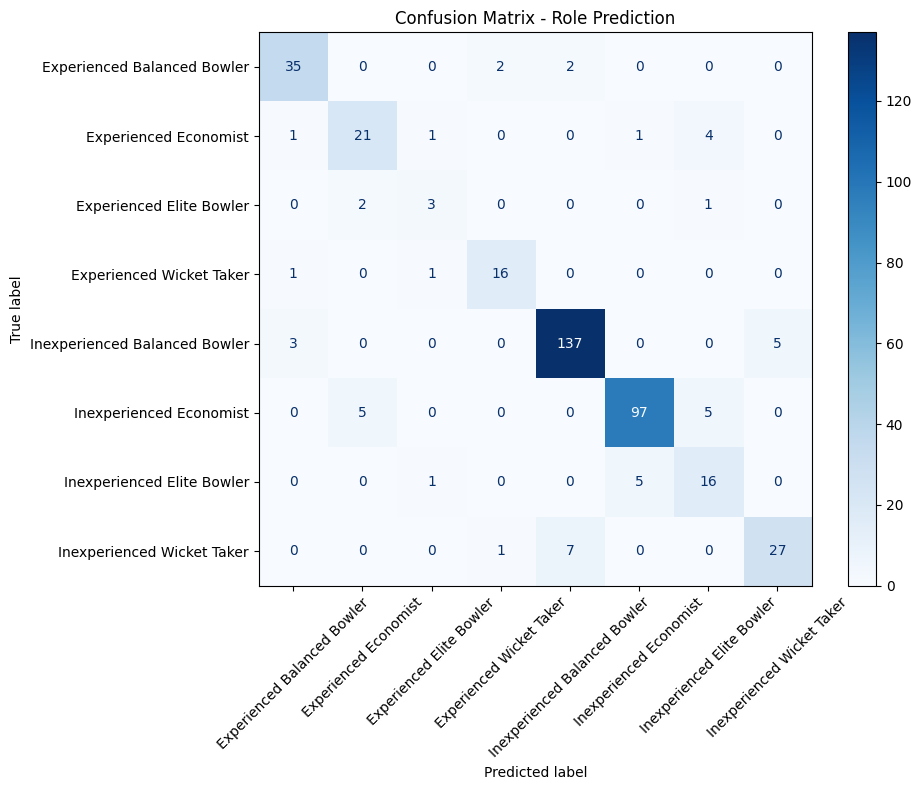

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred_nn)
print(f"\nOverall Accuracy: {accuracy:.2f}")

# Confusion Matrix
'''
cm = confusion_matrix(y_test, y_pred_nn, labels=nn_model.classes_)
print("\nConfusion Matrix:")
print(cm)'
'''

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn_model.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Role Prediction")
plt.tight_layout()
plt.show()


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nn))

                               precision    recall  f1-score   support

  Experienced Balanced Bowler       0.71      0.87      0.78        39
        Experienced Economist       0.79      0.76      0.77        29
     Experienced Elite Bowler       0.62      0.83      0.71         6
     Experienced Wicket Taker       0.85      0.61      0.71        18
Inexperienced Balanced Bowler       0.95      0.91      0.93       146
      Inexperienced Economist       0.92      0.89      0.90       107
   Inexperienced Elite Bowler       0.61      0.64      0.62        22
   Inexperienced Wicket Taker       0.70      0.79      0.74        33

                     accuracy                           0.85       400
                    macro avg       0.77      0.79      0.77       400
                 weighted avg       0.86      0.85      0.85       400



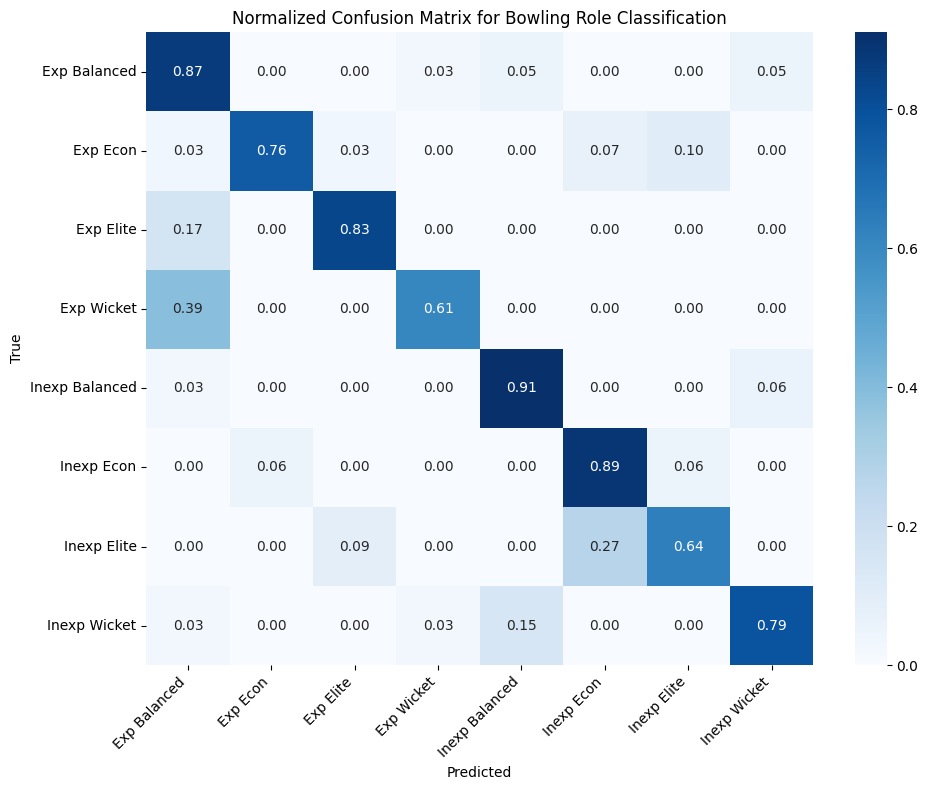

Per-class accuracy:
Exp Balanced: 0.872
Exp Econ: 0.759
Exp Elite: 0.833
Exp Wicket: 0.611
Inexp Balanced: 0.911
Inexp Econ: 0.888
Inexp Elite: 0.636
Inexp Wicket: 0.788


In [81]:
# Generate and plot normalized confusion matrix for bowlers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Get unique classes
classes = np.unique(y_test)

# Create abbreviated labels for better display
abbreviated_labels = {
    "Experienced Elite Bowler": "Exp Elite",
    "Experienced Wicket Taker": "Exp Wicket",
    "Experienced Economist": "Exp Econ",
    "Experienced Balanced Bowler": "Exp Balanced",
    "Inexperienced Elite Bowler": "Inexp Elite",
    "Inexperienced Wicket Taker": "Inexp Wicket",
    "Inexperienced Economist": "Inexp Econ",
    "Inexperienced Balanced Bowler": "Inexp Balanced"
}

# Map full names to abbreviations
short_labels = [abbreviated_labels.get(label, label) for label in classes]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            xticklabels=short_labels,
            yticklabels=short_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix for Bowling Role Classification')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print accuracy per class
print("Per-class accuracy:")
for i, class_name in enumerate(classes):
    class_accuracy = cm_normalized[i, i]
    print(f"{abbreviated_labels.get(class_name, class_name)}: {class_accuracy:.3f}")

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Load the batting data
print("Loading and preprocessing data...")
df = pd.read_csv("batting_data.csv")
print(f"Data shape: {df.shape}")

# Calculate career length if not already present
if 'career_length' not in df.columns:
    df['career_length'] = df['end_year'] - df['start_year'] + 1

# Calculate boundary percentage
if 'boundary_pct' not in df.columns:
    df['boundary_pct'] = ((4 * df['fours'] + 6 * df['sixes']) / df['runs']) * 100
    # Handle potential infinite or NaN values for players with zero runs
    df['boundary_pct'] = df['boundary_pct'].fillna(0).replace([np.inf, -np.inf], 0)

# Define features for model
features = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes", "boundary_pct"]
X = df[features].fillna(df[features].mean())  # Handle any missing values

# Apply multi-class labels instead of single classifications
print("Applying multi-class labels...")

# Define thresholds for each category
# For anchors - higher average is better
anchor_avg_threshold = df['avg'].quantile(0.6)  # Upper 40% of averages
# For power hitters - higher strike rate and boundary percentage are better
power_sr_threshold = df['sr'].quantile(0.7)  # Upper 30% of strike rates
power_boundary_threshold = df['boundary_pct'].quantile(0.7)  # Upper 30% of boundary percentages
# For finishers - high strike rate in combination with decent number of matches
finisher_sr_threshold = df['sr'].quantile(0.8)  # Upper 20% of strike rates
# For experience - either career length > 5 or matches > 50
experience_threshold_years = 4.5
experience_threshold_matches = 20
experience_threshold_runs = 500

# Create binary classification columns
df['is_anchor'] = (df['avg'] >= anchor_avg_threshold) & (df['runs'] > df['runs'].quantile(0.4))
df['is_power_hitter'] = (df['sr'] >= power_sr_threshold) & (df['boundary_pct'] >= power_boundary_threshold)
df['is_finisher'] = (df['sr'] >= finisher_sr_threshold) & (df['mat'] > 10)
df['is_experienced'] = (df['career_length'] > experience_threshold_years) & \
                       (df['mat'] >= experience_threshold_matches) & \
                       (df['runs'] >= experience_threshold_runs)

# Create composite role
df['role'] = ''

# Function to determine composite role
def assign_role(row):
    role_parts = []
    
    # Experience part
    experience = "Experienced" if row['is_experienced'] else "Inexperienced"
    role_parts.append(experience)
    
    # Batting style part
    if row['is_anchor'] and row['is_power_hitter'] and row['is_finisher']:
        role_parts.append("Elite Batter")
    elif row['is_anchor'] and row['is_power_hitter']:
        role_parts.append("Versatile Batter")
    elif row['is_anchor'] and row['is_finisher']:
        role_parts.append("Anchor Finisher")
    elif row['is_power_hitter'] and row['is_finisher']:
        role_parts.append("Explosive Finisher")
    elif row['is_anchor']:
        role_parts.append("Anchor")
    elif row['is_power_hitter']:
        role_parts.append("Power Hitter")
    elif row['is_finisher']:
        role_parts.append("Finisher")
    else:
        role_parts.append("Balanced Batter")
    
    return " ".join(role_parts)

# Apply the function to create the composite role
df['role'] = df.apply(assign_role, axis=1)

print("\nRole distribution:")
print(df['role'].value_counts())

# Prepare data for ML model
X_final = df[features]
y_final = df['role']

# First, create and fit the scaler with all data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Then create and fit PCA with all data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split after preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_final, test_size=0.2, random_state=42, stratify=y_final
)

print(f"\nTraining neural network classifier...")
# Neural Network with hyperparameter tuning
nn_params = {
    'hidden_layer_sizes': [(128, 64), (256, 128, 64)],
    'activation': ['relu'],
    'alpha': [0.001, 0.0005],
    'max_iter': [2000]
}

nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)

print(f"\nBest neural network parameters: {nn_model.best_params_}")

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Print classification report
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Save the trained model components
print("\nSaving the trained model components...")
joblib.dump(scaler, "batting_scaler.pkl")
joblib.dump(pca, "batting_pca.pkl")
joblib.dump(nn_model, "batting_nn_model.pkl")
print("Models saved as separate components")

# Add predicted roles to original dataframe
# We need to apply the same transformations as during training
X_final_transformed = pca.transform(scaler.transform(X_final))
df['predicted_role'] = nn_model.predict(X_final_transformed)
df.to_csv("batting_data_with_roles.csv", index=False)
print("Enhanced data saved as 'batting_data_with_roles.csv'")

# Print some examples of each category
print("\nExample players for each role:")
for role in df['role'].unique():
    role_players = df[df['role'] == role]
    if len(role_players) > 0:
        print(f"\n{role} examples:")
        print(role_players.head(3)[['player', 'mat', 'runs', 'avg', 'sr', 'fours', 'sixes', 'boundary_pct', 'role']])

# Summary statistics for each category
print("\nSummary statistics by role:")
role_stats = df.groupby('role')[features].mean().round(2)
print(role_stats)

# Create a function to classify new batters
def classify_batter(player_data):
    """
    Classify a new batter using the trained model components
    
    Parameters:
    player_data (dict): Dictionary with keys ['mat', 'runs', 'avg', 'sr', 'career_length', 'fours', 'sixes', 'boundary_pct']
                        If 'boundary_pct' is not provided, it will be calculated
    
    Returns:
    str: Predicted role
    """
    # Convert to DataFrame
    player_df = pd.DataFrame([player_data])
    
    # Calculate boundary percentage if not provided
    if 'boundary_pct' not in player_data and 'runs' in player_data and 'fours' in player_data and 'sixes' in player_data:
        if player_data['runs'] > 0:
            player_df['boundary_pct'] = ((4 * player_data['fours'] + 6 * player_data['sixes']) / player_data['runs']) * 100
        else:
            player_df['boundary_pct'] = 0
    
    # Load model components
    scaler = joblib.load("batting_scaler.pkl")
    pca = joblib.load("batting_pca.pkl")
    nn_model = joblib.load("batting_nn_model.pkl")
    
    # Apply the same transformations
    player_scaled = scaler.transform(player_df[features])
    player_pca = pca.transform(player_scaled)
    
    # Predict using the model
    predicted_role = nn_model.predict(player_pca)[0]
    
    return predicted_role

Loading and preprocessing data...
Data shape: (2000, 12)
Applying multi-class labels...

Role distribution:
role
Inexperienced Balanced Batter       989
Experienced Anchor                  260
Experienced Balanced Batter         145
Inexperienced Anchor                133
Inexperienced Power Hitter           96
Experienced Elite Batter             80
Inexperienced Explosive Finisher     62
Inexperienced Elite Batter           47
Experienced Anchor Finisher          36
Experienced Explosive Finisher       29
Inexperienced Finisher               29
Experienced Versatile Batter         28
Inexperienced Anchor Finisher        24
Inexperienced Versatile Batter       24
Experienced Power Hitter             11
Experienced Finisher                  7
Name: count, dtype: int64

Training neural network classifier...

Best neural network parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64), 'max_iter': 2000}

Neural Network Classification Report:
               

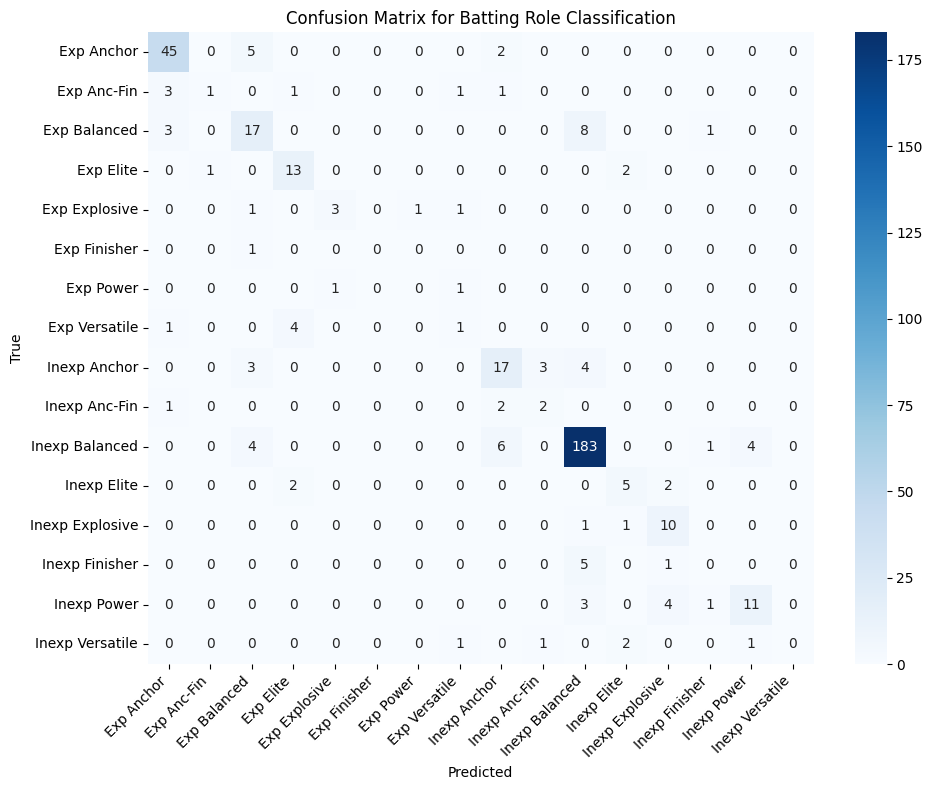

Per-class accuracy:
Exp Anchor: 0.865
Exp Anc-Fin: 0.143
Exp Balanced: 0.586
Exp Elite: 0.812
Exp Explosive: 0.500
Exp Finisher: 0.000
Exp Power: 0.000
Exp Versatile: 0.167
Inexp Anchor: 0.630
Inexp Anc-Fin: 0.400
Inexp Balanced: 0.924
Inexp Elite: 0.556
Inexp Explosive: 0.833
Inexp Finisher: 0.000
Inexp Power: 0.579
Inexp Versatile: 0.000


In [65]:
# Generate and plot confusion matrix with abbreviated labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

# Get unique classes
classes = np.unique(y_test)

# Create abbreviated labels for better display
abbreviated_labels = {
    "Experienced Elite Batter": "Exp Elite",
    "Experienced Versatile Batter": "Exp Versatile",
    "Experienced Anchor": "Exp Anchor",
    "Experienced Power Hitter": "Exp Power",
    "Experienced Finisher": "Exp Finisher",
    "Experienced Explosive Finisher": "Exp Explosive",
    "Experienced Anchor Finisher": "Exp Anc-Fin",
    "Experienced Balanced Batter": "Exp Balanced",
    "Inexperienced Elite Batter": "Inexp Elite",
    "Inexperienced Versatile Batter": "Inexp Versatile",
    "Inexperienced Anchor": "Inexp Anchor",
    "Inexperienced Power Hitter": "Inexp Power",
    "Inexperienced Finisher": "Inexp Finisher",
    "Inexperienced Explosive Finisher": "Inexp Explosive",
    "Inexperienced Anchor Finisher": "Inexp Anc-Fin",
    "Inexperienced Balanced Batter": "Inexp Balanced"
}

# Map full names to abbreviations
short_labels = [abbreviated_labels.get(label, label) for label in classes]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=short_labels,
            yticklabels=short_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Batting Role Classification')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate accuracy per class
print("Per-class accuracy:")
for i, class_name in enumerate(classes):
    class_accuracy = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    print(f"{abbreviated_labels.get(class_name, class_name)}: {class_accuracy:.3f}")

In [66]:
# Overall accuracy, precision, recall, F1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nn))

                                  precision    recall  f1-score   support

              Experienced Anchor       0.85      0.87      0.86        52
     Experienced Anchor Finisher       0.50      0.14      0.22         7
     Experienced Balanced Batter       0.55      0.59      0.57        29
        Experienced Elite Batter       0.65      0.81      0.72        16
  Experienced Explosive Finisher       0.75      0.50      0.60         6
            Experienced Finisher       0.00      0.00      0.00         1
        Experienced Power Hitter       0.00      0.00      0.00         2
    Experienced Versatile Batter       0.20      0.17      0.18         6
            Inexperienced Anchor       0.61      0.63      0.62        27
   Inexperienced Anchor Finisher       0.33      0.40      0.36         5
   Inexperienced Balanced Batter       0.90      0.92      0.91       198
      Inexperienced Elite Batter       0.50      0.56      0.53         9
Inexperienced Explosive Finisher     

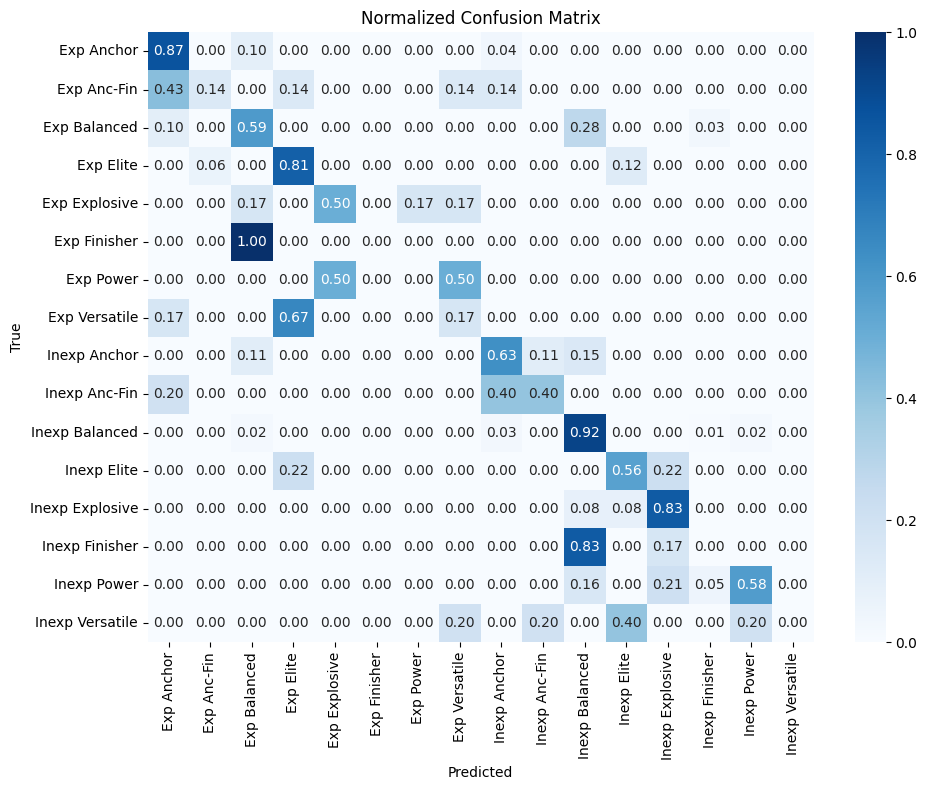

In [67]:
# Normalized confusion matrix (shows percentages instead of raw counts)
import numpy as np

cm = confusion_matrix(y_test, y_pred_nn)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            xticklabels=short_labels,
            yticklabels=short_labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()